### Analysis of WADA Anti-Doping Testing figures
The dateset was taken from 2017 Anti- Doping Testing figures report presented by World Anti - Doping Agency. You can find this report [here.](https://www.wada-ama.org/en/what-we-do/anti-doping-statistics).

In this project I analysed the dataset containg the total of **adverse analytical findings** from urine and blood test of athletes (AAF).Please note that there are a few origines of doping substances found in the samples and not all of them means Anti-Doping Rule Violation. Also, the sample of one athlete can contain several AAF, so associating number of AAF with number of athletes is incorrect. The datasets presents the total AAF per **doping substance class** and **sport discipline**.The relavant tables from WADA report underwent simply Excel edition. I attach the csv file.

The idea of this project to use some data science tools to search if there are correlations and dependencies between different types of doping substances, detected in samples. (This analysis is my private data science project and it doesn't have any confirmation from toxicology specialists.)

## Data Introduction

In [1]:
import  pandas  as  pd
import  matplotlib.pyplot  as plt
import seaborn as sns; sns.set()
import scipy.stats
from matplotlib import cm as cm
% matplotlib inline
doping = pd.read_csv('antidoping.csv')
print(doping.head())

     Sports                         Discipline "Anabolic Agents S1."  \
0  Aquatics       Swimming Sprint 100m or less                    19   
1       NaN  Swimming Middle Distance 200‐400m                     5   
2       NaN                         Open Water                     3   
3       NaN                         Water Polo                     2   
4       NaN                             Diving                     2   

  "Peptide Hormones, Growth Factors and Related Substances S2."  \
0                                                  ‐              
1                                                  ‐              
2                                                  1              
3                                                  ‐              
4                                                  ‐              

  "Beta‐2 Agonists S3." "Hormone and Metabolic Modulators S4."  \
0                     6                                      1   
1                     1         

## Data Cleaning

In [2]:
# deleting rows with NaN values
cols=doping.columns[2:]
doping_new=doping.dropna(subset=cols)
lenght=len(doping.columns)

In [3]:
#replacing str by int and irregular hyphen format
for i in range(2,lenght):
    doping_new.iloc[:,i]=doping_new.iloc[:,i].str.replace("‐","0")
    doping_new.iloc[:,i]=doping_new.iloc[:,i].str.replace("-","0")
    doping_new.iloc[:,i]=doping_new.iloc[:,i].astype(int)

C:\Users\Oktawia\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Oktawia\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
doping_new.columns=["Sport","Discipline","Anabolic Agents","Peptide Hormones, Growth Factors and Related Substances","Beta‐2 Agonists","Hormone and Metabolic Modulators","Diuretics and Other Masking Agents","Stimulants","Narcotics","Cannabinoids","Glucocortico‐ steroids","Alcohol","Beta‐ Blockers","Enhancement of Oxygen Transfer","Chemical and Physical Manipulation","Sub total"]
doping_new.columns
doping_new["Discipline"].fillna(doping_new["Sport"])

0                Swimming Sprint 100m or less
1           Swimming Middle Distance 200‐400m
2                                  Open Water
3                                  Water Polo
4                                      Diving
5      Swimming Long Distance 800m or greater
6                                    Aquatics
7                                     Archery
8                                     Recurve
9                                    Compound
10             Long Distance 3000m or greater
11                        Sprint 400m or less
12                                     Throws
13                                   Marathon
14                                      Jumps
15                  Middle Distance 800‐1500m
16                            Combined Events
17                                  Race Walk
18                              Cross Country
19                                  Athletics
20                               Road Running
21                              Ul

In [5]:
# two  classes of substances: "Alcohol", " Enhancement of Oxygen Tarnsfer M1" and "Chemical and Physical Manipulation M2"  are susceptible to
# have no AAF detected 
# checking if those tw columns contains only 0.

print(doping_new[doping_new.loc[:,"Alcohol"]!=0])
print(doping_new[doping_new.loc[:,"Enhancement of Oxygen Transfer"]!=0])
print(doping_new[doping_new.loc[:,"Chemical and Physical Manipulation"]!=0])

Empty DataFrame
Columns: [Sport, Discipline, Anabolic Agents, Peptide Hormones, Growth Factors and Related Substances, Beta‐2 Agonists, Hormone and Metabolic Modulators, Diuretics and Other Masking Agents, Stimulants, Narcotics, Cannabinoids, Glucocortico‐ steroids, Alcohol, Beta‐ Blockers, Enhancement of Oxygen Transfer, Chemical and Physical Manipulation, Sub total]
Index: []
Empty DataFrame
Columns: [Sport, Discipline, Anabolic Agents, Peptide Hormones, Growth Factors and Related Substances, Beta‐2 Agonists, Hormone and Metabolic Modulators, Diuretics and Other Masking Agents, Stimulants, Narcotics, Cannabinoids, Glucocortico‐ steroids, Alcohol, Beta‐ Blockers, Enhancement of Oxygen Transfer, Chemical and Physical Manipulation, Sub total]
Index: []
    Sport    Discipline  Anabolic Agents  \
191   NaN  Powerlifting              151   

     Peptide Hormones, Growth Factors and Related Substances  Beta‐2 Agonists  \
191                                                  4              

In [6]:
# droping columns with no significant inputs

doping_clean=doping_new.drop(columns=["Sport","Alcohol","Enhancement of Oxygen Transfer","Sub total"],axis=1)
doping_clean.head()

,Discipline,Anabolic Agents,"Peptide Hormones, Growth Factors and Related Substances",Beta‐2 Agonists,Hormone and Metabolic Modulators,Diuretics and Other Masking Agents,Stimulants,Narcotics,Cannabinoids,Glucocortico‐ steroids,Beta‐ Blockers,Chemical and Physical Manipulation
0,Swimming Sprint 100m or less,19,0,6,1,1,7,0,0,2,0,0
1,Swimming Middle Distance 200‐400m,5,0,1,1,5,2,0,0,2,0,0
2,Open Water,3,1,0,0,1,4,0,0,0,0,0
3,Water Polo,2,0,0,2,0,1,0,1,0,0,0
4,Diving,2,0,0,0,0,3,0,0,0,0,0


###  - Pearson Correlation Coefficient
The Pearson correlation cooeffcient (PCC) indicates if there is any linear correlation inbetween two data sets ( in my case each two doping classes). The range of PPC varies from -1 ( inversely - proportional strong linear correlation) and 1 ( strong linear correlation). The threshold of PPC value indicating a strong correlation is arbitrary and depends on field of science. I assume **PCC > 0.75** and **PCC < -0.75** as indicating strong correlation.

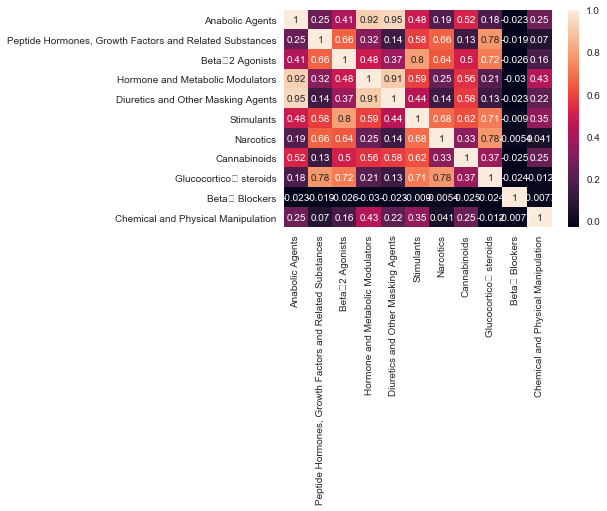

In [7]:
cor=doping_clean.iloc[:,1:].corr()
ax = sns.heatmap(cor,annot=True)

In [8]:
cor

,Anabolic Agents,"Peptide Hormones, Growth Factors and Related Substances",Beta‐2 Agonists,Hormone and Metabolic Modulators,Diuretics and Other Masking Agents,Stimulants,Narcotics,Cannabinoids,Glucocortico‐ steroids,Beta‐ Blockers,Chemical and Physical Manipulation
Anabolic Agents,1.000000,0.247923,0.413186,0.919973,0.945380,0.484927,0.193809,0.517465,0.175652,-0.023419,0.254420
"Peptide Hormones, Growth Factors and Related Substances",0.247923,1.000000,0.660942,0.322605,0.140914,0.581788,0.661223,0.131738,0.775584,-0.019214,0.069528
Beta‐2 Agonists,0.413186,0.660942,1.000000,0.482218,0.371043,0.796472,0.639648,0.503439,0.715839,-0.026212,0.163734
Hormone and Metabolic Modulators,0.919973,0.322605,0.482218,1.000000,0.907627,0.587061,0.245104,0.555398,0.205940,-0.030345,0.427685
Diuretics and Other Masking Agents,0.945380,0.140914,0.371043,0.907627,1.000000,0.442413,0.140328,0.577628,0.134316,-0.022809,0.222549
Stimulants,0.484927,0.581788,0.796472,0.587061,0.442413,1.000000,0.683187,0.619894,0.713828,-0.009003,0.345757
Narcotics,0.193809,0.661223,0.639648,0.245104,0.140328,0.683187,1.000000,0.332684,0.775901,-0.005418,0.041283
Cannabinoids,0.517465,0.131738,0.503439,0.555398,0.577628,0.619894,0.332684,1.000000,0.369460,-0.024962,0.250565
Glucocortico‐ steroids,0.175652,0.775584,0.715839,0.205940,0.134316,0.713828,0.775901,0.369460,1.000000,-0.023621,-0.012108
Beta‐ Blockers,-0.023419,-0.019214,-0.026212,-0.030345,-0.022809,-0.009003,-0.005418,-0.024962,-0.023621,1.000000,-0.007658


Analysis of PCC shows that there are strong correlations between doping classes below:

Anabolic Agents - Hormone and Metabolic Modulators

Anabolic Agents - Diuretics and Other Masking Agents

Hormone and Metabolic Modulators - Diuretics and Other Masking Agents

Beta‐2 Agonists - Stimulants

Peptide Hormones, Growth Factors and Related Substances - Glucocortico‐ steroids

Narcotics - Glucocortico‐ steroids

Even though PCC of Peptide Hormones and Narcotics is 0.66 I would also consider this correlation as significant.

### K - Nearest Neighbors Algorithm

I applied KNN model to predict the result (the number of AAF) of specific doping class, having given the results for another doping classes in specific discipline.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#preparing the dataset 

def prepare_set(doping_name):
    x=doping_clean.iloc[:,1:]
    x=x.drop(doping_name,axis=1)
    y=doping_clean.loc[:,doping_name]
    return x,y

    

In [10]:
# spliting dataset into training and test set

def split(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)
    return X_train, X_test, y_train, y_test

In [11]:
list1 = list(range(1,30))
def cross_val(x,y):
    # arbitrary max of k
    cv_scores = []

    for k in list1:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn,x,y, cv=5,scoring='accuracy')
        cv_scores.append(scores.mean())
    return cv_scores


In [12]:
#optimal k
def optimal(X_train, X_test, y_train, y_test):
    accuracy_of_k=[]
    for i in range(1,30):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        a=accuracy_score(y_test, pred)
        accuracy_of_k.append(a)
        
    return accuracy_of_k

In [13]:
# creating the plot showing accuracy error as a function of k

def k_errorplot(cv_scores):
    
    MSE = [1 - x for x in cv_scores]

    optimal_k = list1[cv_scores.index(min(cv_scores))]
    print ("Optimal k:  %d" % optimal_k)

    plt.plot(list1, cv_scores)
    plt.xlabel('K')
    plt.ylabel('Error')
    return optimal_k,plt.show()

In [14]:
def k_accuracyplot(accuracy_of_k):
    
    MSE = [ x for x in accuracy_of_k]

    optimal_k = list1[accuracy_of_k.index(max(accuracy_of_k))]
    print ("Optimal k:  %d" % optimal_k)

    plt.plot(list1, accuracy_of_k)
    plt.xlabel('K')
    plt.ylabel('Error')
    return optimal_k,plt.show()

In [15]:
# predicting a concrete value of doping class for optimal k

import numpy as np

def prediction(n,row,x,optimal_k):
    data=x
    
    feature=data.iloc[row,:] # knowing element features
    data.drop(row)
    index=len(data)
    lebels=len(data.columns)
    
    distances=[]
# KNN in manual way
#calculating distances between neighbors and element
    for z in range(0,index):
        suma=0
        for i in range(0,lebels):
            suma+=np.square(feature[i]- data.iloc[z,i])
       
            distance=np.sqrt(suma)
  
        distances.append([distance, z])
    distances= sorted(distances) 
    targets=[]
    for i in range(0,optimal_k):# selecting k nearest neighbors
        index1 = distances[i][1]
        
        targets.append(doping_clean.iloc[index1,n])
    result= np.mean(targets)
    return result




## Examples of questions and application

### 1. What number of AAF of Beta‐2 Agonists can we expect in Athletics - Throws samples set?¶

In [16]:
cols=doping_clean.iloc[:,1:].columns
cols

Index(['Anabolic Agents',
       'Peptide Hormones, Growth Factors and Related Substances',
       'Beta‐2 Agonists', 'Hormone and Metabolic Modulators',
       'Diuretics and Other Masking Agents', 'Stimulants', 'Narcotics',
       'Cannabinoids', 'Glucocortico‐ steroids', 'Beta‐ Blockers',
       'Chemical and Physical Manipulation'],
      dtype='object')

In [17]:
x,y=prepare_set(cols[2])
X_train, X_test, y_train, y_test=split(x,y)

# simple approach to find optimal k
accuracy_of_k=optimal(X_train, X_test, y_train, y_test)
# finding optimal k based on cross validation
cv_scores=cross_val(x,y)

C:\Users\Oktawia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Oktawia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Oktawia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Oktawia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few

Optimal k:  1


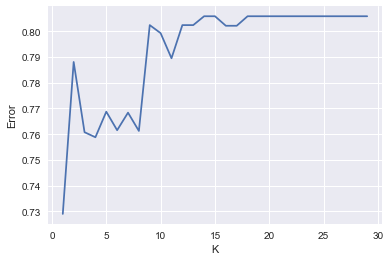

In [18]:
a=np.array(k_errorplot(cv_scores))
optimal_k=a[0]

Optimal k:  2


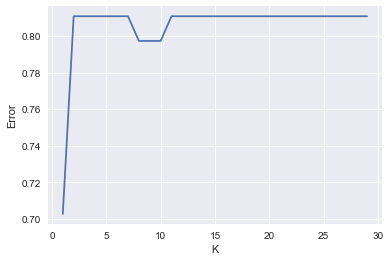

In [19]:
b=np.array(k_accuracyplot(accuracy_of_k))
optimal_k_by_accur=b[0]

In [20]:
print("Predicted value:  %d" % prediction(2,12,x,optimal_k))
print("Real value: ", doping_clean.iloc[12,3])

Predicted value:  0
Real value:  2


In [21]:
print("Predicted value:  %d" % prediction(2,12,x,optimal_k_by_accur))
print("Real value: ", doping_clean.iloc[12,3])

Predicted value:  4
Real value:  2
